# How I gather drawing data

I *manually* collect data from all 1,900+ (and counting) drawings from an experienced furry artist and illustrator, Paco (aka pandapaco, or Paco Panda). The data will collect things such as:

- Name and date of the artwork
- Species and character names
- Number of character in each artwork
- Facial expressions
- Medium (either drawn digitally or traditional with exceptions of programs and tools used)
- Source (either from FurAffinity or DeviantArt)

I was also planning to get the most colors used, as in only in each characters, excluding backgrounds, items, etc. However, because I have deal with shading and color correction, it will be a tedious and cumbersome dataset to obtain; yes we can refer it to their fursona's ref sheet and get the colors that way but there are some cases that it won't be available, so for now - I won't add this dataset.

## Dealing with `species` and `characters` columns

Since there are 2 or more characters, and some duplicates - there will be an extra set of columns for each `species` and `characters` that'll be incremented by one. I assume that there are 3 to 6 characters he draws on each artwork.

For generalizing the `species` data to the website, it's going to be categorized into, well... foxes, canines, cats, yeens, etc. Hybrids are categorized in their own, while species like protogens, and other exotic and/or fictional species will be categorized as "Others".

## How this process works
[This Google Sheet](https://docs.google.com/spreadsheets/d/1fpNL-qbfZ53H-6WdqEB2X9rwn9QmM1porJqKgBC7rPk/edit?usp=sharing) contains all raw data and get a slice of data as an example to truncate, summarize, visualize some data through the web browser.

As an example, we'll take one of his artworks [*"First Meet"*](https://www.deviantart.com/pandapaco/art/First-Meet-901151258) and analyze it, the image is cropped for clarity.
<p>
  <a href="https://www.deviantart.com/pandapaco/art/First-Meet-901151258">
    <img src="public/jupyter-assets/first_meet_by_pandapaco.jpg" width="600">
  </a>
</p>

Two characters are visible: which are Kazan and Steffen respectively, their species are wolf and an otter; Kazan's expression is shy, while Steffen is engaging to Kazan, where I append the `Engaged` value in the `Expression(s)` column; the artwork is traditionally drawn taken from a camera. So overall, the result should be something like this in the dataset:

In [3]:
# Import stuff to render the dataset
import pandas as paco
import numpy as np
import matplotlib.pyplot as plt

In [4]:
shy_boi = ['12/19/21', 'First Meet', 'Kazan, Steffen', 'Wolf, Otter',
        'Shy, Engaged', 'Traditional'],

paco.DataFrame(shy_boi, columns = ["Date", "Title", "Character(s)", "Species",
                              "Expression(s)", "Medium"])

,Date,Title,Character(s),Species,Expression(s),Medium
0,12/19/21,First Meet,"Kazan, Steffen","Wolf, Otter","Shy, Engaged",Traditional


Nice! And in other example, we'll use a huge dataset and will get data from his artwork from January 2021 alone. The column `source` is included in the sheets but omitted for brevity; it should be something like this:

In [5]:
paco_jan_dataset = paco.read_csv('./ipynb-dataset/paco-jan2021.csv')
paco_jan_dataset

,Date,Title,Character(s),Species,Expression(s),Medium
0,1/5/21,Calm always come,"Zak, Cirrus","Fox, Fox","Engaged, Calm",Digital
1,1/7/21,Alf Doggo,Alf,Dog,Neutral,Digital
2,1/8/21,A Hidden Shrine,"Shibby, Emerald","Fox, Fox",Ecstatic,Traditional
3,1/14/21,Puck the Sabertooth,Puck,Sabertooth,"Laughter, Neutral",Digital
4,1/15/21,Doctor Nodd,Nodd,Mouse,Curious,Traditional
5,1/18/21,Turt and Apollo,"RadiantBlaze, Turt","Wuskylynx™, Fox",Warm,Digital
6,1/18/21,Roni and Veemon,"Roni, Veemoon","Collie, Digimon",Happy,Traditional
7,1/20/21,Millones de Kilometros,"Sans, Rush","Velociraptor, Reindeer","Engaged, Curious",Digital
8,1/24/21,Kai Telegram Stickers,"Kai (8), Paco","Red Panda, Panda","Warm, Plotting, Blushing, Engaged",Digital
9,1/27/21,Robin and Nick,"Robin Hood, Nick Wilde","Fox, Fox","Engaged, Happy",Digital


Initally, I was using a Python script to convert an exported CSV files off of Google Sheets into JSON files... The only time I realized that this was the most dumbest thing I've made since D3 and Chart.js can read off of CSV files... lol

In [ ]:
import csv
import json

In [ ]:
# Specify a CSV files in the assets folder
# and will split in each dataset then
# dookies out a json file
with open("assets/raw_ps.csv", "r") as f: 
  reader = csv.reader(f)
  next(reader)
  data = []
  for row in reader:
    data.append(
        {"date": row[0],
         "name": row[1],
         "characters": row[2],
         "species": row[3],
         "expressions": row[4],
         "medium": row[5],
         "source": row[6]
         })

with open("assets/final.json", "w") as f:
  json.dump(data, f, indent=2)
  print("Dookied out a stupid json file")

## Plotting data
First we plot a pie chart for Digital and Traditional artworks lol

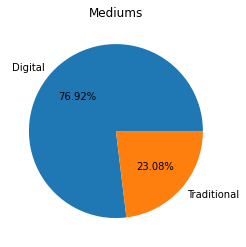

In [13]:
digital = paco_jan_dataset.loc[paco_jan_dataset['Medium'] == 'Digital'].count()[0]
traditional = paco_jan_dataset.loc[paco_jan_dataset['Medium'] == 'Traditional'].count()[0]

labels =['Digital', 'Traditional']

plt.pie([digital, traditional], labels = labels, autopct = '%.2f%%')
plt.title("Mediums")
plt.show()